# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import chi2_contingency
from scipy.stats import chi2

##### l uses 4 centers around the globe to process customer order forms. They audit a certain %  of the customer order forms. Any error in order form renders it defective and has to be reworked before processing.  
##### The manager wants to check whether the defective %  varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences


In [4]:
data = pd.read_csv('Costomer+OrderForm.csv')
data.head()

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


In [6]:
data.isna().sum()

Phillippines    0
Indonesia       0
Malta           0
India           0
dtype: int64

In [7]:
data.describe().T

,count,unique,top,freq
Phillippines,300,2,Error Free,271
Indonesia,300,2,Error Free,267
Malta,300,2,Error Free,269
India,300,2,Error Free,280


In [15]:
data1 = data.replace({'Error Free','Defective'},{1,0})
data1.head()

,Phillippines,Indonesia,Malta,India
0,1,1,0,1
1,1,1,1,0
2,1,0,0,1
3,1,1,1,1
4,1,1,0,1


In [16]:
data1.corr().style.background_gradient(cmap='coolwarm')

,Phillippines,Indonesia,Malta,India
Phillippines,1.000000,-0.042901,0.037181,0.003015
Indonesia,-0.042901,1.000000,0.195643,-0.008542
Malta,0.037181,0.195643,1.000000,-0.090728
India,0.003015,-0.008542,-0.090728,1.000000


<AxesSubplot:>

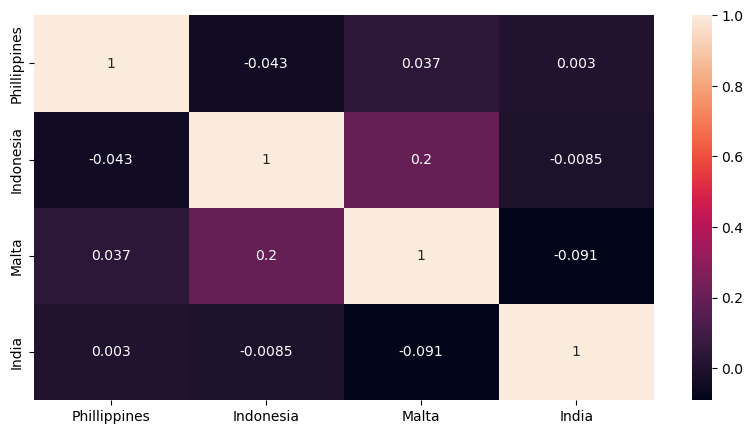

In [17]:
plt.figure(figsize = (10,5))
sns.heatmap(data1.corr(),annot = True)

In [18]:
data1 =data1.stack().reset_index()
data1.head()

,level_0,level_1,0
0,0,Phillippines,1
1,0,Indonesia,1
2,0,Malta,0
3,0,India,1
4,1,Phillippines,1


In [20]:
df = data1.rename(columns = {'level_1':'Country', 0:'Category'})
df

,level_0,Country,Category
0,0,Phillippines,1
1,0,Indonesia,1
2,0,Malta,0
3,0,India,1
4,1,Phillippines,1
...,...,...,...
1195,298,India,1
1196,299,Phillippines,1
1197,299,Indonesia,0
1198,299,Malta,0


In [21]:
df = pd.crosstab(df['Country'],df['Category'])
df.head()

Category,0,1
Country,,
India,20,280
Indonesia,33,267
Malta,31,269
Phillippines,29,271


In [22]:
stat, p, dof,expected = chi2_contingency(df)
print('Degree of freedom: %d'%dof)

Degree of freedom: 3


In [23]:
print(expected)

[[ 28.25 271.75]
 [ 28.25 271.75]
 [ 28.25 271.75]
 [ 28.25 271.75]]


In [24]:
prob = 0.95
critical = chi2.ppf(prob,dof)
print('Probability: %.3f,Critical: %.3f,stat:%.3f'% (prob,critical,stat))

Probability: 0.950,Critical: 7.815,stat:3.859


In [25]:
if abs(stat) >= critical:
    print('dependent reject H0')
else:
    print('Independent reject H1')

alpha = 1 - prob
print('Significance: %.3f,P-value: %.3f'% (alpha,p))

if p<= alpha:
    print('dependent reject H0')
else:
    print('Independent reject H1')

Independent reject H1
Significance: 0.050,P-value: 0.277
Independent reject H1


**As per observation, We rejected alternative hypothesis it means that defective % not varies with telecom center.**

#### A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? 

##### Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.


In [27]:
data2 = pd.read_csv('Cutlets.csv')
data2.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [28]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


In [29]:
data2.isna().sum()

Unit A    0
Unit B    0
dtype: int64

In [30]:
unita = pd.Series(data2.iloc[:,0])
unitb = pd.Series(data2.iloc[:,1])

In [36]:
print('mean of unit A: %.2f'%np.mean(unita),'median of unit A: %.2f'%np.median(unita))
print('mean of unit B: %.2f'%np.mean(unitb),'median of unit B: %.2f'%np.median(unitb))

mean of unit A: 7.02 median of unit A: 6.94
mean of unit B: 6.96 median of unit B: 6.94


In [37]:
p_value = stats.ttest_ind(unita,unitb,random_state=None, alternative='two-sided')
p_value

Ttest_indResult(statistic=0.7228688704678063, pvalue=0.4722394724599501)

In [38]:
alpha = 0.05
if p_value[1] <= alpha:
    print('dependent (Reject H0)')
else:
    print('Independent (Reject H1)')

Independent (Reject H1)


**The diameter of the cutlet of two unit is same. By rejecting alternative hypothesis (H1) which is mean of A & B not equal.**

### Sales of products in four different regions is tabulated for males and females. Find if male-female buyer rations are similar across regions.

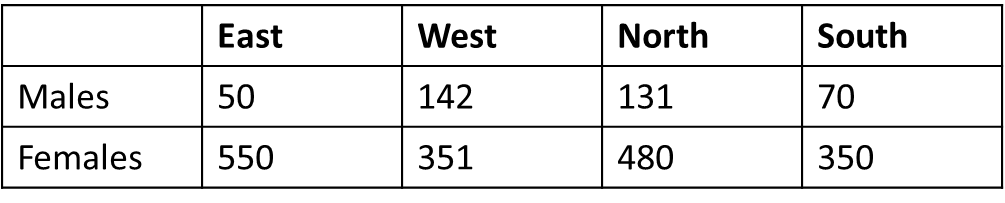

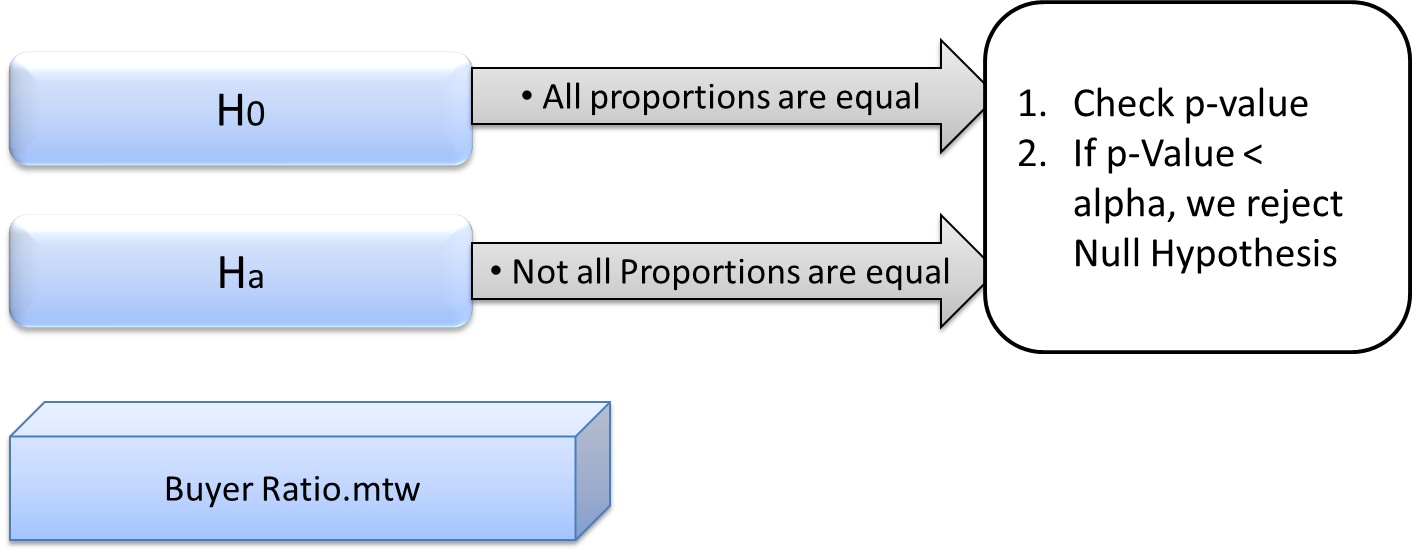

In [40]:
data3 = pd.read_csv('BuyerRatio.csv')
data3

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [41]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Observed Values  2 non-null      object
 1   East             2 non-null      int64 
 2   West             2 non-null      int64 
 3   North            2 non-null      int64 
 4   South            2 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 208.0+ bytes


In [42]:
data3_loc = data3.iloc[:,1:]
data3_loc

,East,West,North,South
0,50,142,131,70
1,435,1523,1356,750


In [43]:
stat,p,dof,expected = stats.chi2_contingency(data3_loc)


In [44]:
print(expected)


[[  42.76531299  146.81287862  131.11756787   72.30424052]
 [ 442.23468701 1518.18712138 1355.88243213  747.69575948]]


In [45]:
print('Stat: %.2f,P-value: %.2f,degree of freedom: %d'%(stat,p,dof))

Stat: 1.60,P-value: 0.66,degree of freedom: 3


In [46]:
prob = 0.95
critical = stats.chi2.ppf(prob,dof)
print('Critical: %.2f'% (critical))

Critical: 7.81


In [47]:
if abs(stat)>= critical:
    print('Dependent (Reject H0)')
else:
    print('Independent (Reject H1)')
alpha = 1-prob

print('Significance: %.2f,P-value: %.2f'% (alpha,p))

Independent (Reject H1)
Significance: 0.05,P-value: 0.66


In [48]:
if p>= alpha:
    print('Independent (Reject H1)')
else:
    print('Dependent (Reject H0)')

Independent (Reject H1)


**As per the above observation male and female ratios are same in every region.**

#### A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.
   
#### Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.

In [50]:
data4 = pd.read_csv('LabTAT.csv')
data4

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
...,...,...,...,...
115,178.49,170.66,193.80,172.68
116,176.08,183.98,215.25,177.64
117,202.48,174.54,203.99,170.27
118,182.40,197.18,194.52,150.87


In [51]:
data4.isna().sum()

Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64

In [52]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


In [53]:
data4.describe().T

,count,mean,std,min,25%,50%,75%,max
Laboratory 1,120.0,178.361583,13.173594,138.30,170.3350,178.530,186.5350,216.39
Laboratory 2,120.0,178.902917,14.957114,140.55,168.0250,178.870,189.1125,217.86
Laboratory 3,120.0,199.913250,16.539033,159.69,188.2325,199.805,211.3325,238.70
Laboratory 4,120.0,163.682750,15.085080,124.06,154.0500,164.425,172.8825,205.18


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Laboratory 1', ylabel='Density'>

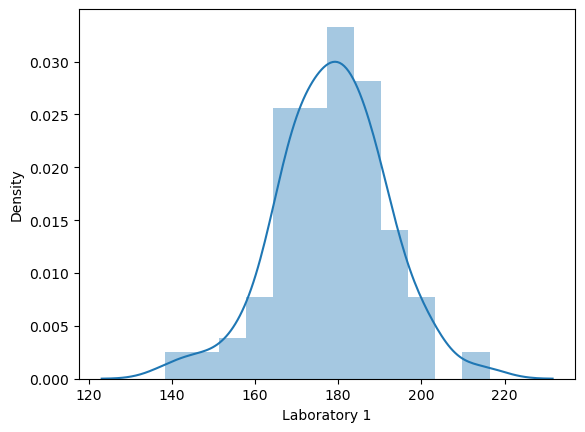

In [54]:
sns.distplot(data4['Laboratory 1'])

In [56]:
x = ['Laboratory 1','Laboratory 2','Laboratory 3','Laboratory 4']

column_dict = {col: pd.DataFrame() for col in x}

def shapiro_test(data):
    stat ,p = shapiro(data)
    print('%s,statistics: %.2f, p: %.2f'% (column,stat,p))
    alpha = 0.05
    if p >= alpha:
        print('Sample look like gaussion we cannot reject H0')
    else:
        print('Sample not look like gaussion we cannot reject H1')
        
for column in x:
    column_dict[column] = data4[column]
    shapiro_test(column_dict[column])

Laboratory 1,statistics: 0.99, p: 0.55
Sample look like gaussion we cannot reject H0
Laboratory 2,statistics: 0.99, p: 0.86
Sample look like gaussion we cannot reject H0
Laboratory 3,statistics: 0.99, p: 0.42
Sample look like gaussion we cannot reject H0
Laboratory 4,statistics: 0.99, p: 0.66
Sample look like gaussion we cannot reject H0


In [58]:
var = stats.levene(data4['Laboratory 1'],data4['Laboratory 2']
                       ,data4['Laboratory 3'],data4['Laboratory 4'])
var

LeveneResult(statistic=2.599642500418024, pvalue=0.05161343808309816)

In [59]:
p_val = stats.f_oneway(data4['Laboratory 1'],data4['Laboratory 2']
                       ,data4['Laboratory 3'],data4['Laboratory 4'])


In [60]:
p_val

F_onewayResult(statistic=118.70421654401437, pvalue=2.1156708949992414e-57)

In [61]:
if p_val[1] >= alpha:
    print('Sample look like normal dist we cannot reject H0')
else:
    print('Sample not look like normal dist we cannot reject H1')

Sample not look like normal dist we cannot reject H1


**there is slight change in average value TAT in combination of Different labs. So the TAT of different lab is not the same.**